### Link your hugging face repo


https://huggingface.co/datasets/UdyanSachdev/Multi_Language_Audio2Text

 ### Json pretty print of the loaded dataset

In [ ]:
from datasets import load_dataset
import librosa
import soundfile

##### Since I have a large dataset, I am subsetting it to the first 20 rows and visualizing them.

In [ ]:
dataset = load_dataset("UdyanSachdev/Multi_Language_Audio2Text",split = "train[:20]")

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

##### Looking at the audio array generated using the soundfile and librosa libraries.

In [ ]:
import pandas as pd

df = pd.DataFrame(dataset['audio'])


In [ ]:
df

path  \
0   /root/.cache/huggingface/datasets/downloads/ec...   
1   /root/.cache/huggingface/datasets/downloads/27...   
2   /root/.cache/huggingface/datasets/downloads/8d...   
3   /root/.cache/huggingface/datasets/downloads/30...   
4   /root/.cache/huggingface/datasets/downloads/a2...   
5   /root/.cache/huggingface/datasets/downloads/25...   
6   /root/.cache/huggingface/datasets/downloads/91...   
7   /root/.cache/huggingface/datasets/downloads/e2...   
8   /root/.cache/huggingface/datasets/downloads/9d...   
9   /root/.cache/huggingface/datasets/downloads/9a...   
10  /root/.cache/huggingface/datasets/downloads/f4...   
11  /root/.cache/huggingface/datasets/downloads/cc...   
12  /root/.cache/huggingface/datasets/downloads/c8...   
13  /root/.cache/huggingface/datasets/downloads/db...   
14  /root/.cache/huggingface/datasets/downloads/cc...   
15  /root/.cache/huggingface/datasets/downloads/41...   
16  /root/.cache/huggingface/datasets/downloads/21...   
17  /root/.cache/huggingface/datasets/downloads/52...   
18  /root/.cache/huggingface/datasets/downloads/4a...   
19  /root/.cache/huggingface/datasets/downloads/5b...   

                                                array  sampling_rate  
0   [0.0, 2.0597287764267946e-11, 4.63668860251065...          32000  
1   [0.0, -1.2169435598119449e-11, -1.371296999563...          32000  
2   [0.0, -1.521169995521987e-11, 2.21211937656562...          32000  
3   [0.0, 2.703341023257977e-12, -7.89693831160232...          32000  
4   [0.0, -1.8755314142027135e-12, -1.155103356714...          32000  
5   [0.0, 5.3588483477085e-12, 2.6250581569575715e...          32000  
6   [0.0, 2.853377256695211e-13, 4.217997479072366...          32000  
7   [0.0, 5.845410960825248e-12, 1.502449857235244...          32000  
8   [0.0, -8.890880219547537e-12, 3.51306679059748...          32000  
9   [0.0, -1.6092065180384196e-11, -2.200375819050...          32000  
10  [0.0, 1.4630466976806034e-11, 7.01245832235297...          32000  
11  [0.0, 2.720106084819207e-11, 2.251890340865259...          32000  
12  [0.0, 2.4418748273413726e-13, -2.3992507199727...          32000  
13  [0.0, -1.0701211618224793e-11, -8.127146525205...          32000  
14  [0.0, 1.0504121010501688e-11, 4.35920657210209...          32000  
15  [0.0, -5.018409299228921e-12, -6.9439007495397...          32000  
16  [0.0, -8.785186120241484e-13, -4.8818457956678...          32000  
17  [0.0, -1.3914638538614632e-11, -8.325104494666...          32000  
18  [0.0, 4.5225385936209506e-12, -8.4980182613048...          32000  
19  [0.0, 5.692206688640011e-12, 7.598575414713427...          32000

### Readme providing the source of the data

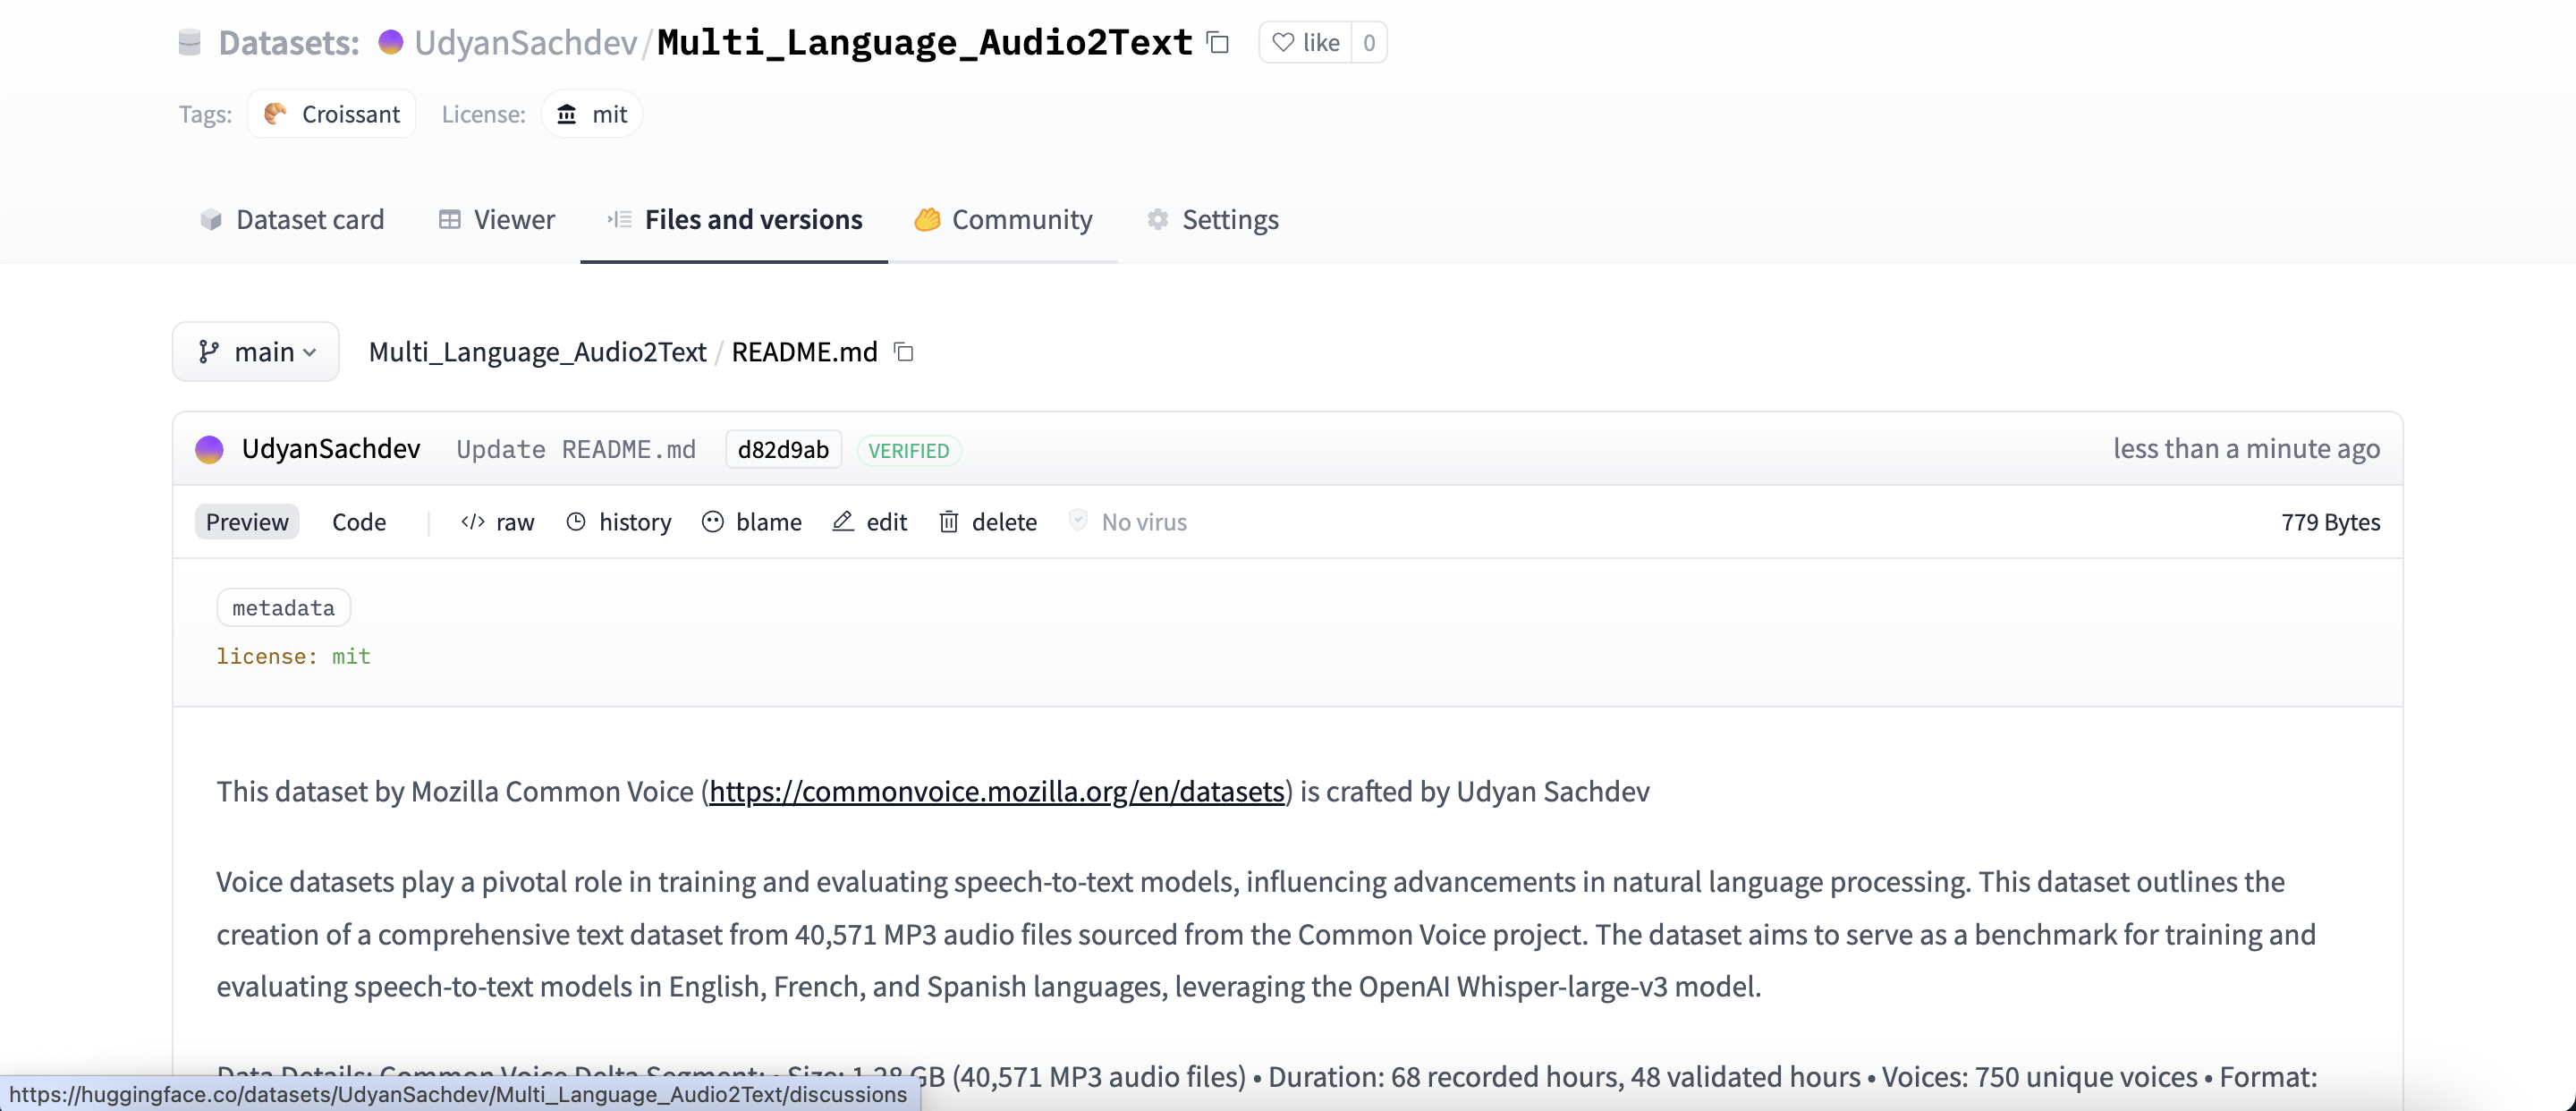

In [ ]:
from PIL import Image

img = Image.open('sample_data/1.png')
display(img)

### Dataset contain proper metadata

##### The dataset contain the metadata along with an additional csv containing the translation

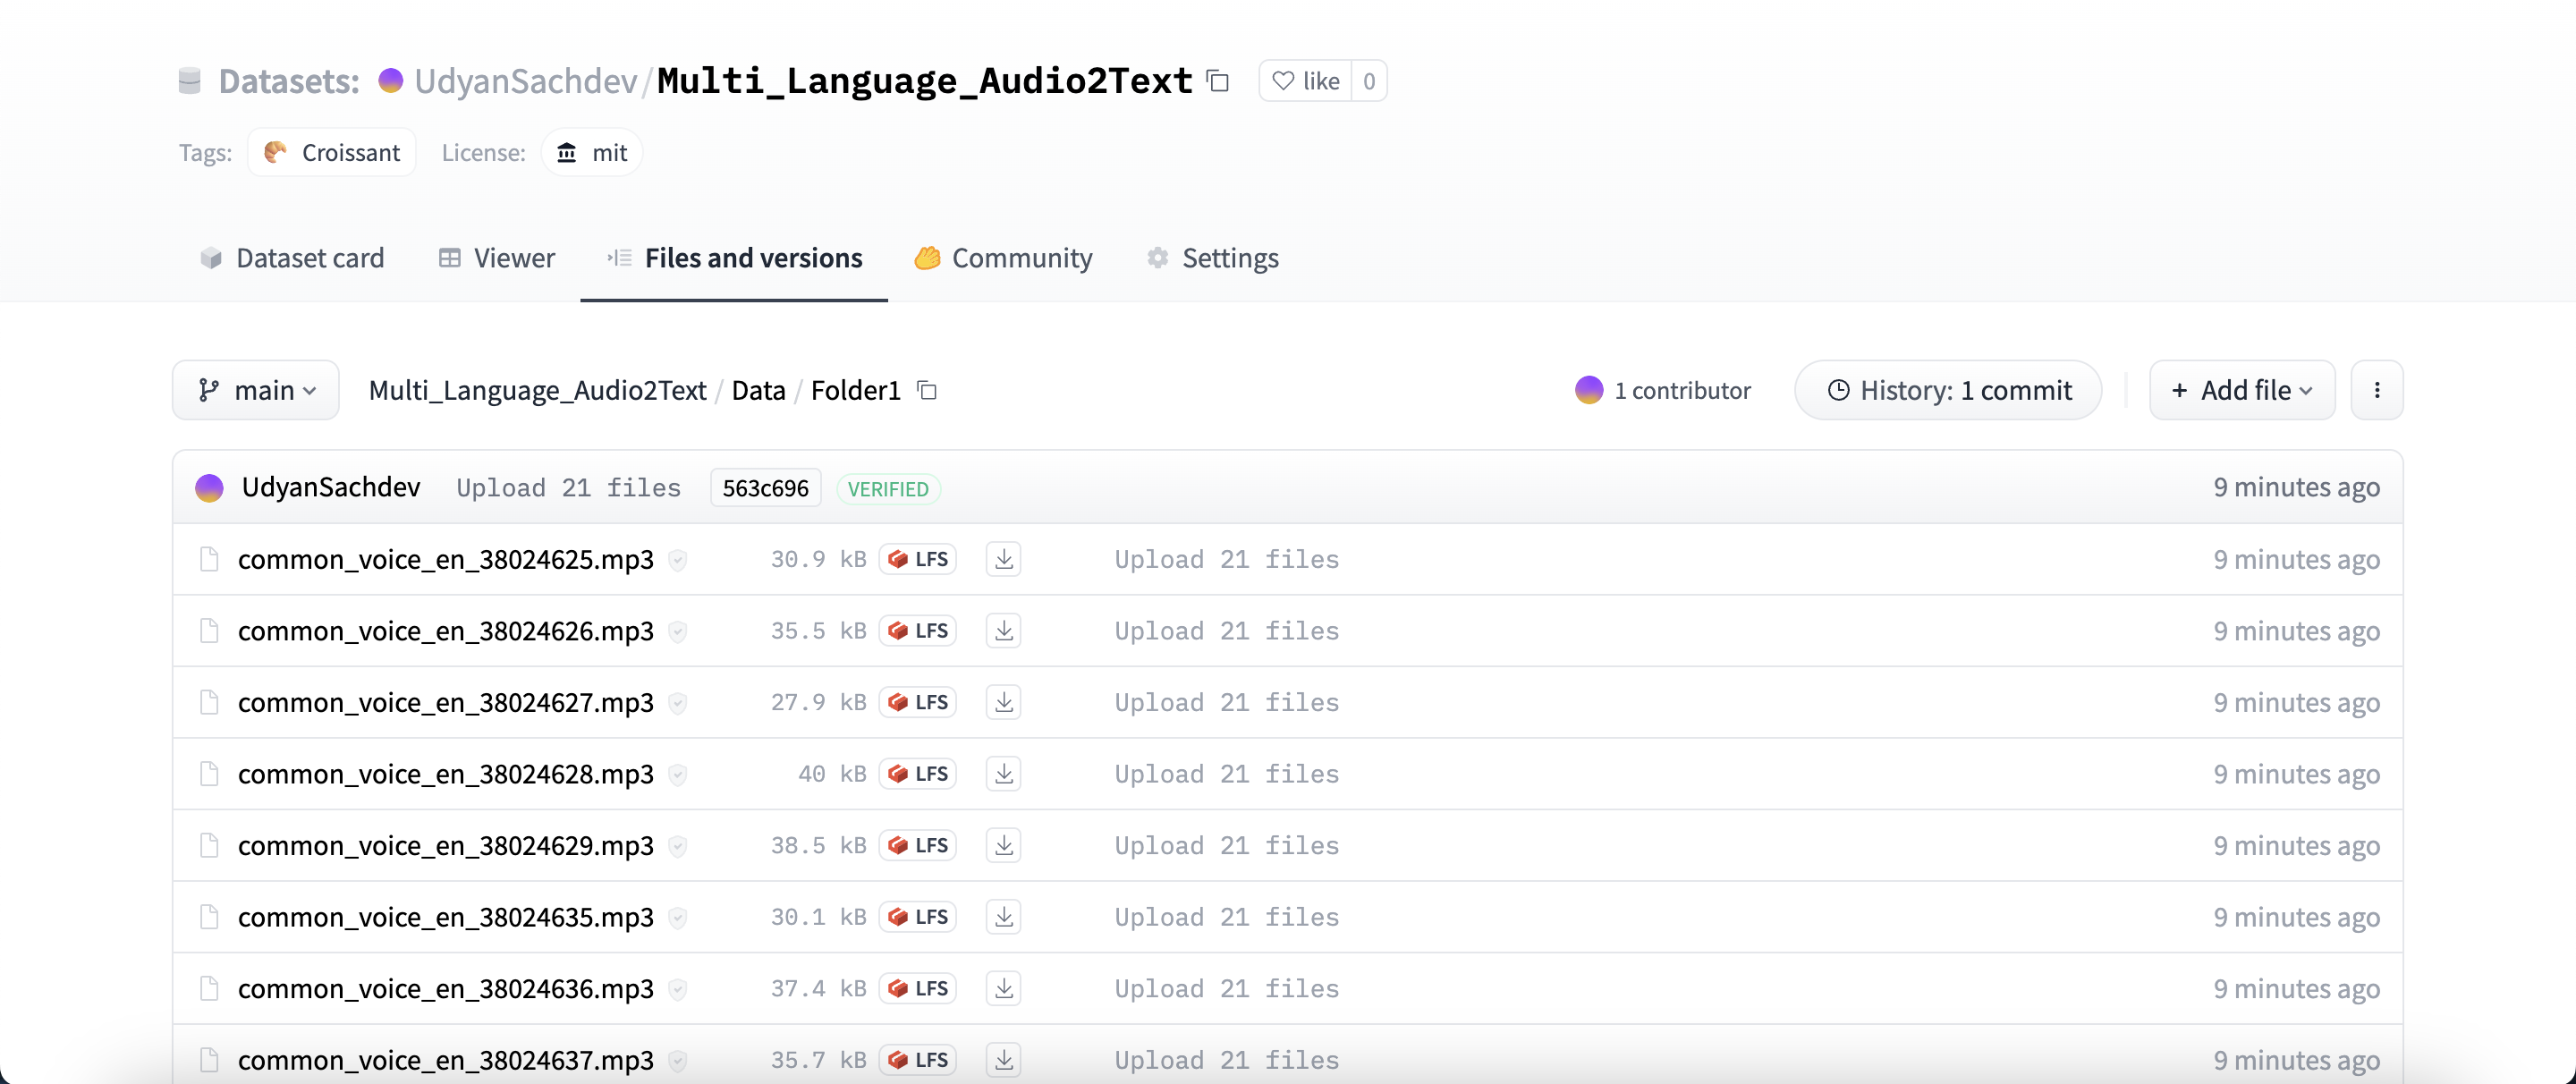

In [ ]:
from PIL import Image

img = Image.open('sample_data/2.png')
display(img)

#### Translation of the audio files

In [ ]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
import accelerate

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "openai/whisper-large-v3"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)

processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    max_new_tokens=128,
    chunk_length_s=30,
    batch_size=16,
    return_timestamps=True,
    torch_dtype=torch_dtype,
    device=device
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('content')

Mounted at content


In [ ]:
import os

path = ['sample_data/Folder1']
file_names = []
en_text = []
count = 0


In [ ]:
# `path` is a list of directory paths
for directory_path in path:
    mp3_files = os.listdir(directory_path)[:20]
    for file_name in mp3_files:
        print(count)
        count += 1
        file_names.append(file_name)  # Append the file name to file_names list
        result = pipe(os.path.join(directory_path, file_name) ,generate_kwargs={"language": "english"})
        en_text.append(result["text"])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
import pandas as pd
output1 = pd.DataFrame(list(zip(en_text, file_names)),
              columns=['en_text','file_names'])
output1['Folder_Name'] = 'Folder1'

##### The below dataframe shows the english translation done for the first 20 files along with the metadata which can help track the file from folder name and file name.

##### The translation is done using *** openai's whisper-large-v3 model ***

In [ ]:
output1

en_text  \
0    The Town of Lyon is served by the Kohama Coun...   
1    but be calmed in the middle of the ocean they...   
2          Barletti wrote this work as an eyewitness.   
3    This emplacement and a similar tower nearby w...   
4    After effecting electrical repairs, the plane...   
5    As the wings, lips disappeared, a fatal sink ...   
6    Arundel High School's rival school is South R...   
7    Meori then rescued some of the survivors from...   
8    The foundations of agriculture in the Oblast ...   
9    Pre-Columbian Texcoco is most noted for its m...   
10                Brown was born in Makwakikta, Iowa.   
11   The Aldegranates date to the late Cambrian an...   
12   Faulkner and Rader went on to form the New Yo...   
13   He stated that he intended to continue on to ...   
14   Linguist Dr. Noel Rude made an orthographic c...   
15   Gulf States Utilities is still a legally inco...   
16   It was named for the small town of Aitayp San...   
17   Females resemble males, but are noticeably sm...   
18   His career continued in sports publishing and...   
19   The previously constructed bridge had to be d...   

                      file_names Folder_Name  
0   common_voice_en_38024625.mp3     Folder1  
1   common_voice_en_38024646.mp3     Folder1  
2   common_voice_en_38024649.mp3     Folder1  
3   common_voice_en_38024639.mp3     Folder1  
4   common_voice_en_38024628.mp3     Folder1  
5   common_voice_en_38024638.mp3     Folder1  
6   common_voice_en_38024635.mp3     Folder1  
7   common_voice_en_38024645.mp3     Folder1  
8   common_voice_en_38024629.mp3     Folder1  
9   common_voice_en_38024636.mp3     Folder1  
10  common_voice_en_38024640.mp3     Folder1  
11  common_voice_en_38024627.mp3     Folder1  
12  common_voice_en_38024643.mp3     Folder1  
13  common_voice_en_38024626.mp3     Folder1  
14  common_voice_en_38024641.mp3     Folder1  
15  common_voice_en_38024637.mp3     Folder1  
16  common_voice_en_38024644.mp3     Folder1  
17  common_voice_en_38024648.mp3     Folder1  
18  common_voice_en_38024642.mp3     Folder1  
19  common_voice_en_38024647.mp3     Folder1

##### Translating to French

In [ ]:
import os

path = ['sample_data/Folder1']
file_names = []
en_text = []
count = 0

# `path` is a list of directory paths
for directory_path in path:
    mp3_files = os.listdir(directory_path)[:20]
    for file_name in mp3_files:
        print(count)
        count += 1
        file_names.append(file_name)  # Append the file name to file_names list
        result = pipe(os.path.join(directory_path, file_name) ,generate_kwargs={"language": "french"})
        en_text.append(result["text"])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
import pandas as pd
output2 = pd.DataFrame(list(zip(en_text, file_names)),
              columns=['french_text','file_names'])
output2['Folder_Name'] = 'Folder1'
output2

french_text  \
0    La ville de Lyon est servie par le district d...   
1    Mais soyez calme, dans le milieu de l'océan, ...   
2    Barletti a écrit ce travail comme un eyewitness.   
3    Cette position et une tower similaire près ét...   
4    Après avoir fait des réparations électriques,...   
5    As the wings lift disappeared, a fatal sink r...   
6    La école rival de l'école Arundel est la écol...   
7    Meori a ensuite rescué certains des survivant...   
8    Les fondations de l'agriculture dans l'Oblast...   
9    Pre-Columbian, Texcoco est le plus noté pour ...   
10                   Brown est né à Makwakikta, Iowa.   
11   Les granites d'Alder date de la période du La...   
12   Faulkner et Rader ont donc commencé à former ...   
13   Il a dit qu'il voulait continuer à l'universi...   
14   Linguiste Dr. Noël Rude a fait une correction...   
15   Gulf States Utilities est encore une entité l...   
16   C'était nommé pour la petite ville de Aïté, S...   
17   Les femmes ressemblent aux hommes mais sont n...   
18   Il a continué son carrière dans le sport de l...   
19      Le pont prévu a dû être démonté et renseigné.   

                      file_names Folder_Name  
0   common_voice_en_38024625.mp3     Folder1  
1   common_voice_en_38024646.mp3     Folder1  
2   common_voice_en_38024649.mp3     Folder1  
3   common_voice_en_38024639.mp3     Folder1  
4   common_voice_en_38024628.mp3     Folder1  
5   common_voice_en_38024638.mp3     Folder1  
6   common_voice_en_38024635.mp3     Folder1  
7   common_voice_en_38024645.mp3     Folder1  
8   common_voice_en_38024629.mp3     Folder1  
9   common_voice_en_38024636.mp3     Folder1  
10  common_voice_en_38024640.mp3     Folder1  
11  common_voice_en_38024627.mp3     Folder1  
12  common_voice_en_38024643.mp3     Folder1  
13  common_voice_en_38024626.mp3     Folder1  
14  common_voice_en_38024641.mp3     Folder1  
15  common_voice_en_38024637.mp3     Folder1  
16  common_voice_en_38024644.mp3     Folder1  
17  common_voice_en_38024648.mp3     Folder1  
18  common_voice_en_38024642.mp3     Folder1  
19  common_voice_en_38024647.mp3     Folder1

### Dataset viewer function

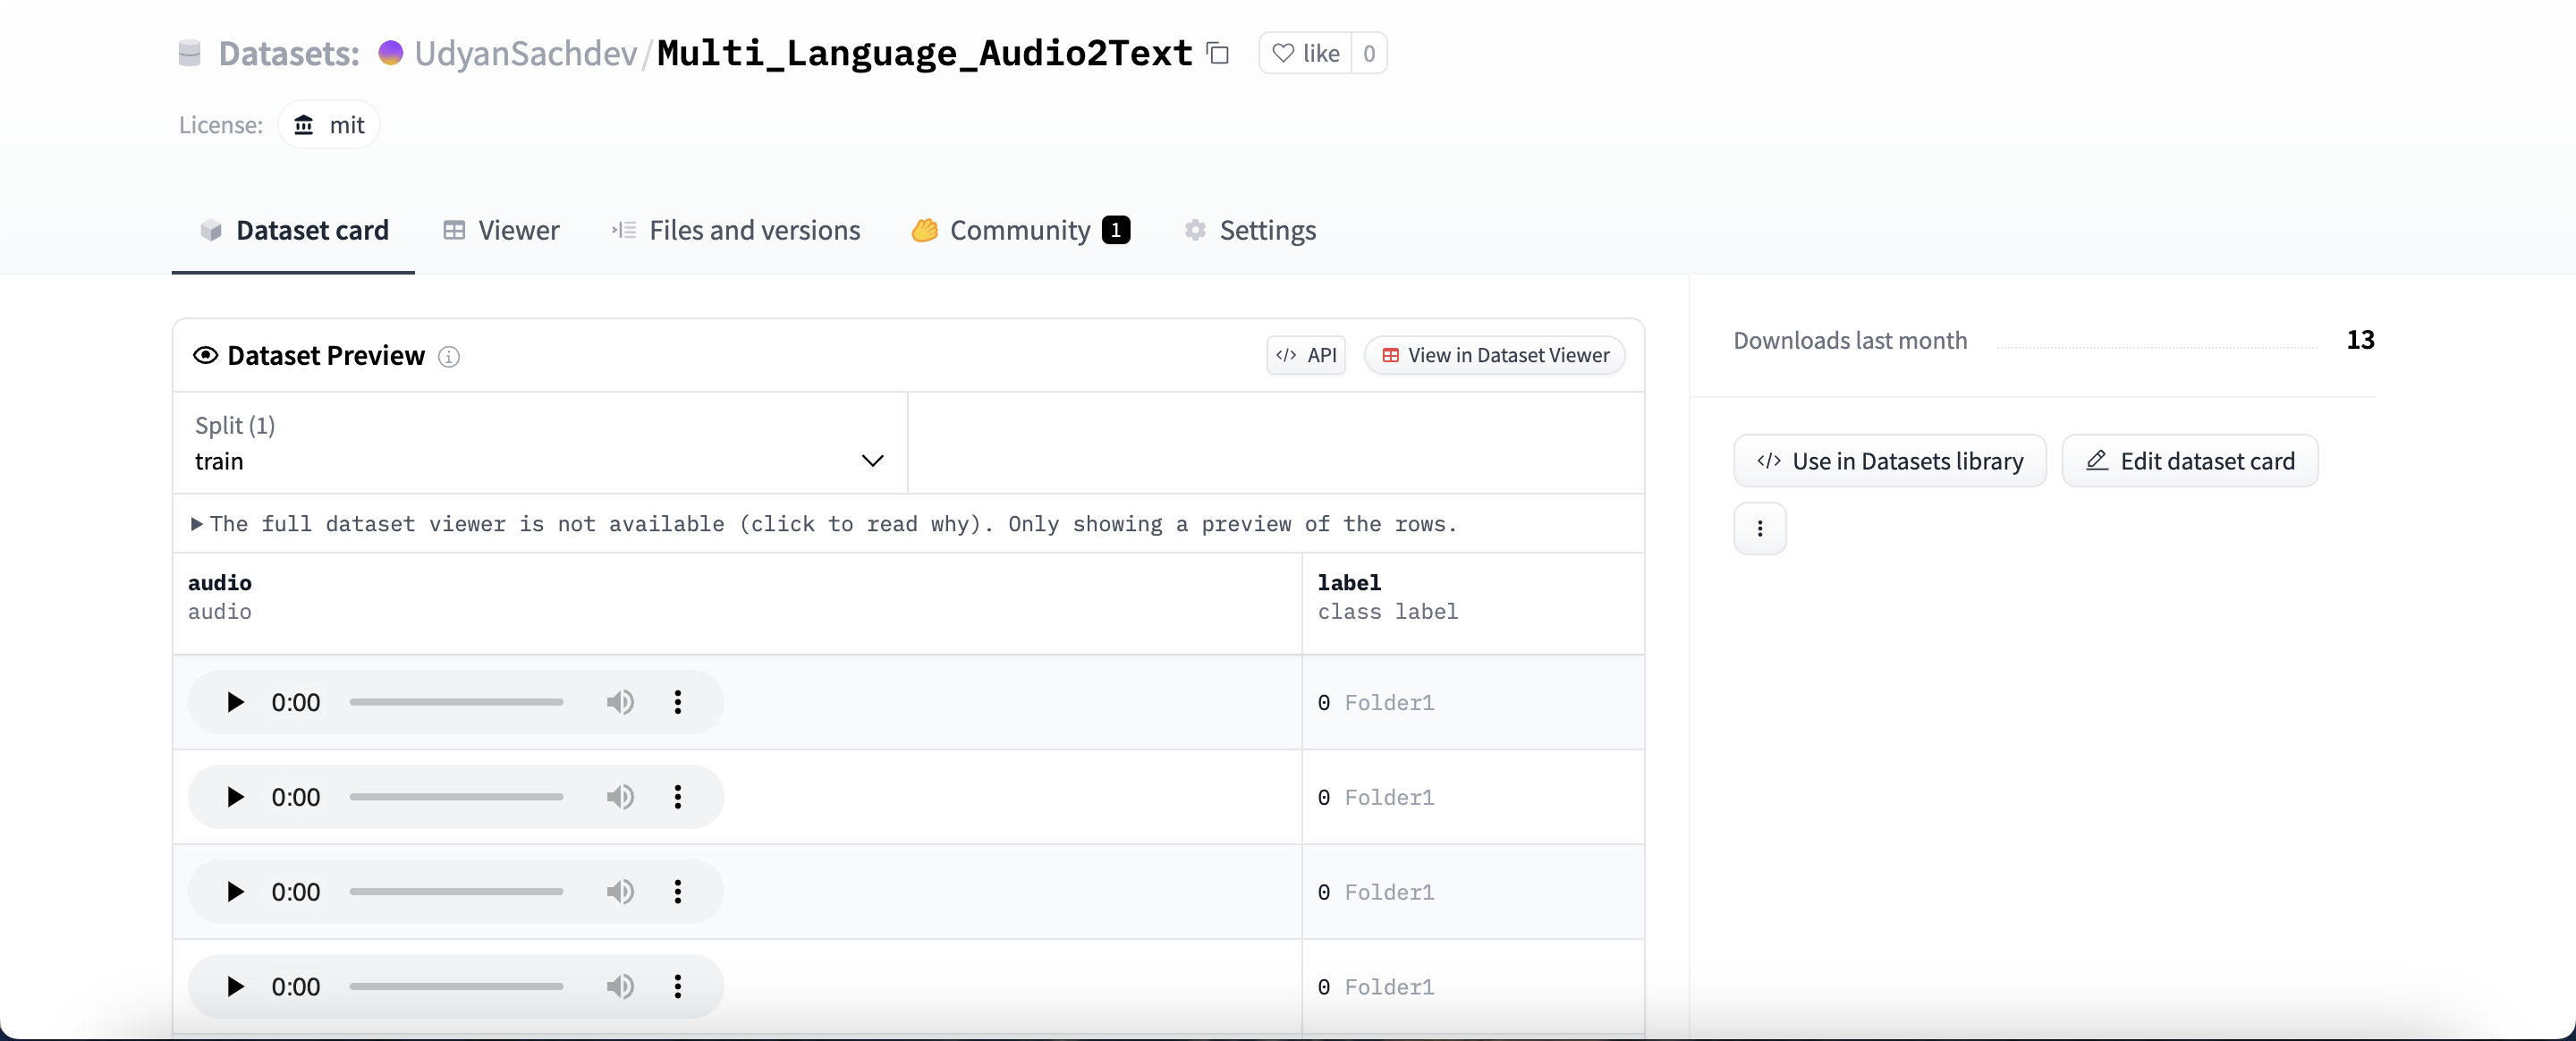

In [ ]:
from PIL import Image

img = Image.open('sample_data/3.png')
display(img)